# Task generation

This page focuses on generating experimenting task to play with recomendation systems.

In [2]:
import numpy as np
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
from IPython.display import HTML
import seaborn as sns
import pandas as pd

## `make_blobs`

You can use [sklearn.datasets.make_blobs](#https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_blobs.html#sklearn.datasets.make_blobs). Each blob is a group of objects by preference. So suppose we have groups of objects that somehow rate two items. There are only two items to make the visualisation easier. The viasulasation of application such case is in the cell before:

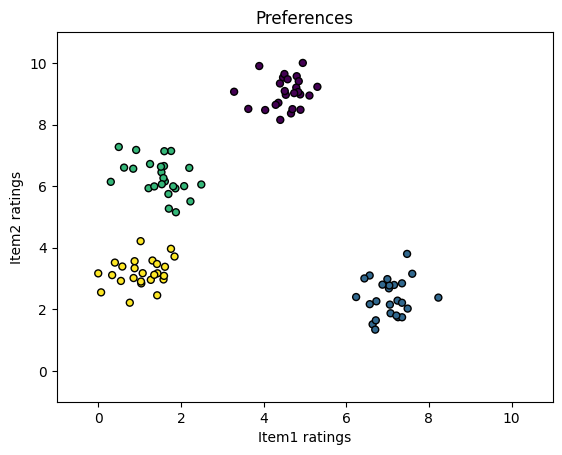

In [2]:
r_width = 10
r_height = 30
n_samples = 100

R, c = make_blobs(
    n_samples=n_samples,
    n_features=2,
    centers=4,
    random_state=23
)
# Normalise the observations to 0,10 
# it's just for convenience.
R = (R-R.min())*10/(R.max()-R.min())
plt.scatter(
    R[:, 0], R[:, 1], 
    marker="o", c=c, 
    s=25, edgecolor="k"
)
plt.xlim(-1,11)
plt.ylim(-1,11)

plt.xlabel("Item1 ratings")
plt.ylabel("Item2 ratings")
plt.title("Preferences")

plt.show()

Here are some groups of users. Some of them prefer item1 more. So if we find an object that really prefers item1 (rates it 7 and more), we can assume that it won't like item2. 

Now let's check how it looks on case that is closer to real live. So here we juts have more items that somehow matches to objects. So we came to matrix like that.

In [3]:
r_width = 10
r_height = 30

R, c = make_blobs(
    n_samples=r_height,
    n_features=r_width,
    centers=3,
    random_state=10
)
R = np.round((R-R.min())*10/(R.max()-R.min())).astype(int)
R

array([[ 7,  9,  0,  6,  8,  6,  7,  3,  9,  8],
       [ 6, 10,  1,  4,  9,  6,  7,  3,  8,  7],
       [ 5,  2,  4,  6,  5,  4,  6,  5,  6,  6],
       [ 6,  9,  1,  6,  8,  6,  8,  3,  9,  7],
       [ 5,  2,  4,  7,  4,  5,  6,  5,  7,  6],
       [ 6,  1,  4,  7,  4,  5,  7,  5,  8,  6],
       [ 7,  9,  1,  6,  8,  6,  7,  3,  9,  8],
       [ 5,  2,  4,  6,  5,  5,  6,  5,  6,  6],
       [ 6,  2,  4,  6,  4,  4,  6,  5,  7,  6],
       [ 6,  1,  5,  7,  4,  4,  6,  5,  7,  7],
       [ 7,  9,  1,  5,  8,  7,  7,  3,  8,  6],
       [ 7,  9,  1,  5,  7,  6,  8,  3,  9,  7],
       [ 9,  1,  6,  7,  5,  2,  3,  7,  2,  1],
       [ 6,  2,  4,  6,  6,  4,  7,  5,  7,  6],
       [ 8,  1,  6,  8,  5,  2,  2,  7,  3,  1],
       [ 8,  1,  6,  6,  6,  3,  2,  7,  2,  2],
       [ 7,  1,  7,  7,  5,  2,  3,  7,  2,  1],
       [ 5,  1,  4,  7,  4,  5,  6,  4,  6,  6],
       [ 6,  2,  4,  7,  5,  5,  6,  5,  6,  6],
       [ 7,  1,  6,  7,  6,  3,  1,  7,  2,  0],
       [ 6, 10,  1, 

Here the settings are rounded to make it easier to see with your eyes. It's already possible to find some patterns. But let's have a look at the submatrices, which are divided by blobs:

In [4]:
for v in np.unique(c):
    display(HTML(f"<hr>Blob{v}"))
    print(R[c==v])

[[9 1 6 7 5 2 3 7 2 1]
 [8 1 6 8 5 2 2 7 3 1]
 [8 1 6 6 6 3 2 7 2 2]
 [7 1 7 7 5 2 3 7 2 1]
 [7 1 6 7 6 3 1 7 2 0]
 [8 1 7 7 5 2 2 7 2 1]
 [7 1 7 6 5 2 2 8 2 1]
 [7 1 6 7 5 2 3 9 3 1]
 [7 1 7 7 5 3 2 8 2 1]
 [8 0 6 7 5 3 2 8 2 2]]


[[ 7  9  0  6  8  6  7  3  9  8]
 [ 6 10  1  4  9  6  7  3  8  7]
 [ 6  9  1  6  8  6  8  3  9  7]
 [ 7  9  1  6  8  6  7  3  9  8]
 [ 7  9  1  5  8  7  7  3  8  6]
 [ 7  9  1  5  7  6  8  3  9  7]
 [ 6 10  1  6  8  7  7  2  9  7]
 [ 7  9  1  6  8  6  7  3  8  7]
 [ 7 10  1  5  7  6  7  4 10  7]
 [ 7  9  0  4  8  7  7  3  9  7]]


[[5 2 4 6 5 4 6 5 6 6]
 [5 2 4 7 4 5 6 5 7 6]
 [6 1 4 7 4 5 7 5 8 6]
 [5 2 4 6 5 5 6 5 6 6]
 [6 2 4 6 4 4 6 5 7 6]
 [6 1 5 7 4 4 6 5 7 7]
 [6 2 4 6 6 4 7 5 7 6]
 [5 1 4 7 4 5 6 4 6 6]
 [6 2 4 7 5 5 6 5 6 6]
 [6 2 3 7 5 5 6 6 6 6]]


Finally, let's check the correlation matrix. All cells should be grouped by blobs. The following cell shows the correlation matrix for $R$ under consideration.

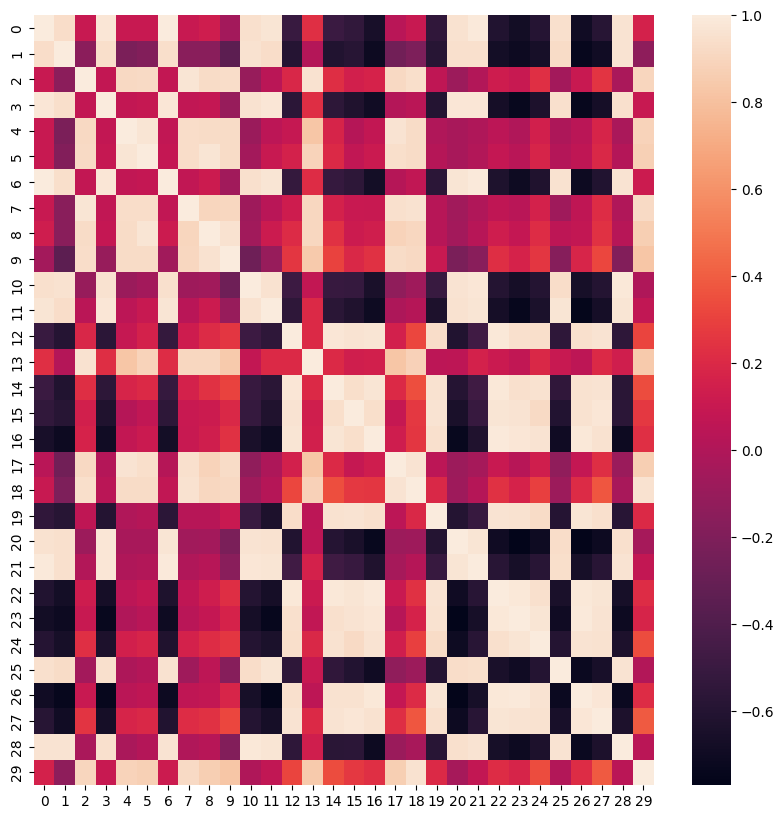

In [5]:
plt.figure(figsize=[10, 10])
sns.heatmap(np.corrcoef(R))
plt.show()

The previous diagram isn't really easy to understand. So we can sort the objects in the $R$ matrix by their blobs. In the following cell, observations are sorted and their correlation matrix is visualised.

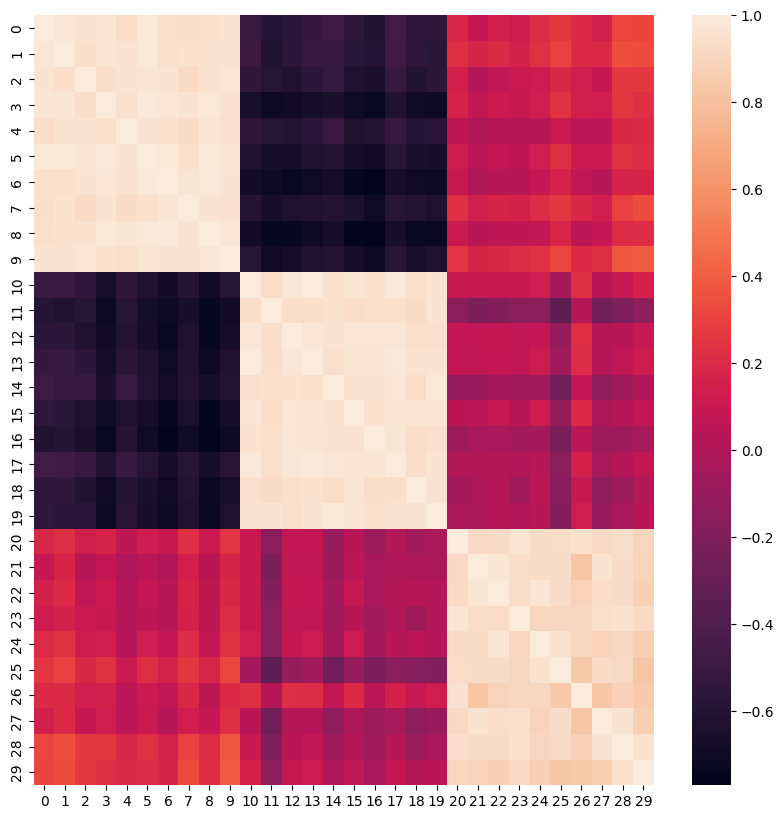

In [6]:
plt.figure(figsize=[10, 10])
clustered_R = np.concatenate([
    R[np.where(c==v)]
    for v in np.unique(c)
])
sns.heatmap(np.corrcoef(clustered_R))
plt.show()

Now objects from the same clusters are visualised in the correlation matrix.

## Object bias

There are some objects that have systematically biased rates. So you can add some random values to each object:

In [7]:
r_width = 10
r_height = 20

R, c = make_blobs(
    n_samples=r_height,
    n_features=r_width,
    centers=3,
    random_state=10
)
R = np.round((R-R.min())*10/(R.max()-R.min())).astype(int)
display(HTML("<hr>"))
display(R)

# add bias for each object
bias = np.random.randint(-2,3, [R.shape[0], 1])
R = R + bias

# sometimes bias can lead to ratings
R = np.where(R<0, 0, R)
R = np.where(R>10, 10, R)
display(HTML("<hr>"))
R

array([[ 7, 10,  1,  4,  8,  5,  7,  3,  9,  7],
       [ 8,  0,  6,  8,  5,  3,  2,  8,  2,  3],
       [ 7, 10,  1,  4,  9,  6,  8,  4,  8,  7],
       [ 6,  1,  4,  7,  4,  5,  7,  6,  6,  6],
       [ 6,  9,  1,  6,  8,  7,  8,  4,  9,  7],
       [ 6,  2,  4,  6,  5,  5,  7,  5,  6,  6],
       [ 8, 10,  1,  6,  8,  6,  7,  3,  9,  8],
       [ 8, 10,  1,  6,  8,  6,  7,  3,  9,  7],
       [ 5,  2,  4,  7,  4,  5,  7,  5,  7,  6],
       [ 7, 10,  1,  5,  8,  6,  8,  4, 10,  7],
       [ 9,  1,  6,  7,  5,  2,  3,  7,  2,  1],
       [ 8,  1,  6,  8,  5,  2,  2,  8,  3,  1],
       [ 7, 10,  1,  5,  8,  6,  9,  3,  9,  7],
       [ 7,  1,  6,  7,  6,  3,  1,  8,  2,  0],
       [ 8,  1,  7,  7,  6,  2,  2,  8,  2,  1],
       [ 6,  1,  5,  7,  5,  5,  6,  5,  6,  5],
       [ 8,  1,  7,  8,  5,  3,  2,  8,  2,  1],
       [ 8,  1,  7,  7,  6,  3,  2,  7,  2,  2],
       [ 6,  2,  4,  7,  5,  5,  6,  5,  7,  7],
       [ 6,  2,  5,  7,  4,  4,  7,  6,  8,  6]])

array([[ 9, 10,  3,  6, 10,  7,  9,  5, 10,  9],
       [ 9,  1,  7,  9,  6,  4,  3,  9,  3,  4],
       [ 6,  9,  0,  3,  8,  5,  7,  3,  7,  6],
       [ 8,  3,  6,  9,  6,  7,  9,  8,  8,  8],
       [ 8, 10,  3,  8, 10,  9, 10,  6, 10,  9],
       [ 4,  0,  2,  4,  3,  3,  5,  3,  4,  4],
       [10, 10,  3,  8, 10,  8,  9,  5, 10, 10],
       [ 6,  8,  0,  4,  6,  4,  5,  1,  7,  5],
       [ 5,  2,  4,  7,  4,  5,  7,  5,  7,  6],
       [ 8, 10,  2,  6,  9,  7,  9,  5, 10,  8],
       [10,  3,  8,  9,  7,  4,  5,  9,  4,  3],
       [ 7,  0,  5,  7,  4,  1,  1,  7,  2,  0],
       [ 8, 10,  2,  6,  9,  7, 10,  4, 10,  8],
       [ 9,  3,  8,  9,  8,  5,  3, 10,  4,  2],
       [ 6,  0,  5,  5,  4,  0,  0,  6,  0,  0],
       [ 8,  3,  7,  9,  7,  7,  8,  7,  8,  7],
       [10,  3,  9, 10,  7,  5,  4, 10,  4,  3],
       [ 6,  0,  5,  5,  4,  1,  0,  5,  0,  0],
       [ 6,  2,  4,  7,  5,  5,  6,  5,  7,  7],
       [ 5,  1,  4,  6,  3,  3,  6,  5,  7,  5]])

## Hide some elements

There are some elements of the $R$ matrix that didn't appear in the observations, so we need to replace some object/item combinations with empty values.

In [8]:
r_width = 10
r_height = 30

R, c = make_blobs(
    n_samples=r_height,
    n_features=r_width,
    centers=3,
    random_state=10
)
R = np.round((R-R.min())*10/(R.max()-R.min())).astype(int)

# genrating combinations of object/item to be empty
combination_counts = 20
nan_combinations = np.concatenate(
    [
        np.random.randint(0, R.shape[0], [combination_counts,1]),
        np.random.randint(0, R.shape[1], [combination_counts,1])
    ],
    axis=1
)

# replacing some combinations with emptys
R = R.astype("float32")
for comb in nan_combinations:
    R[tuple(comb)] = np.NaN
R

array([[ 7.,  9.,  0.,  6.,  8.,  6.,  7.,  3.,  9.,  8.],
       [ 6., 10.,  1.,  4.,  9.,  6.,  7.,  3.,  8.,  7.],
       [ 5.,  2.,  4.,  6.,  5.,  4., nan,  5.,  6.,  6.],
       [ 6.,  9.,  1.,  6., nan,  6.,  8., nan,  9.,  7.],
       [nan,  2.,  4.,  7.,  4.,  5.,  6.,  5.,  7.,  6.],
       [ 6.,  1.,  4.,  7., nan, nan,  7.,  5.,  8.,  6.],
       [nan,  9.,  1.,  6.,  8., nan,  7.,  3.,  9.,  8.],
       [ 5.,  2.,  4.,  6.,  5.,  5., nan,  5.,  6.,  6.],
       [ 6.,  2.,  4.,  6.,  4.,  4.,  6.,  5.,  7.,  6.],
       [ 6.,  1.,  5.,  7.,  4.,  4.,  6.,  5.,  7.,  7.],
       [ 7.,  9.,  1.,  5.,  8.,  7.,  7.,  3.,  8.,  6.],
       [ 7., nan,  1.,  5.,  7.,  6.,  8.,  3.,  9.,  7.],
       [ 9.,  1.,  6.,  7.,  5.,  2.,  3.,  7.,  2.,  1.],
       [ 6.,  2., nan,  6.,  6.,  4.,  7.,  5.,  7.,  6.],
       [ 8.,  1.,  6.,  8.,  5.,  2.,  2.,  7.,  3.,  1.],
       [ 8.,  1.,  6.,  6.,  6.,  3.,  2.,  7.,  2., nan],
       [ 7.,  1.,  7.,  7.,  5.,  2.,  3.,  7.,  2., nan

## As dataframe

It's common to represent the `R` matrix as a format table:

|object|item|score|
|:-----|:---|:----|
|1|1|$r_{11}$|
|1|2|$r_{12}$|
|...|...|...|
|$i$|$j$|$r_{ij}$|
|...|...|...|
|$n$|$m$|$r_{nm}$|

The following cell shows how such a table can be created from the $R$ matrix in the examples above.

In [6]:
r_width = 10
r_height = 30

R, c = make_blobs(
    n_samples=r_height,
    n_features=r_width,
    centers=3,
    random_state=10
)
R = np.round((R-R.min())*10/(R.max()-R.min())).astype(int)


R_frame = pd.Series(
    R.ravel(),
    index = pd.MultiIndex.from_tuples(
        [
            (j,i) 
            for j in np.arange(R.shape[1]) 
            for i in np.arange(R.shape[0])
        ],
        names = ["object", "item"]
    ),
    name = "rank"
).reset_index()

R_frame.sample(10)

,object,item,rank
48,1,18,7
61,2,1,9
57,1,27,5
182,6,2,4
58,1,28,8
146,4,26,2
270,9,0,8
62,2,2,1
76,2,16,6
189,6,9,6
